In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
import keras

In [2]:
!unzip /content/Dataset.zip

Archive:  /content/Dataset.zip
   creating: Dataset/train/
   creating: Dataset/train/EarlyBlight/
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_100.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1000.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1002.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1004.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1005.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1006.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1007.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1008.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1009.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1011.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1012.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1013.jpg  
  inflating: Dataset/train/EarlyBlight/EarlyBlight_1014.jpg  
  inflating: Dataset/train/EarlyBligh

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load training data
training_data = keras.preprocessing.image_dataset_from_directory(
    '/content/Dataset/train',
    batch_size=70,
    image_size=(240, 240),
    shuffle=True,
    seed=123,
    subset='training',
    validation_split=0.15
)

# Load validation data
validation_data = keras.preprocessing.image_dataset_from_directory(
    '/content/Dataset/val',
    batch_size=70,
    image_size=(240, 240),
    shuffle=True,
    seed=123,
    validation_split=0.15,
    subset='validation'
)

# Define the MobileNet model
mobilenet_model = Sequential()
pretrained_mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(240, 240, 3), pooling='avg')

# Freeze the layers of the pretrained model
for layer in pretrained_mobilenet.layers:
    layer.trainable = False

# Add layers on top of MobileNet
mobilenet_model.add(pretrained_mobilenet)
mobilenet_model.add(Flatten())
mobilenet_model.add(BatchNormalization())
mobilenet_model.add(Dense(512, activation='relu'))
mobilenet_model.add(BatchNormalization())
mobilenet_model.add(Dense(10, activation='softmax'))

# Compile the model
mobilenet_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = mobilenet_model.fit(training_data, steps_per_epoch=len(training_data), epochs=30,
                               validation_data=validation_data, validation_steps=len(validation_data))

Found 3257 files belonging to 3 classes.
Using 2769 files for training.
Found 815 files belonging to 3 classes.
Using 122 files for validation.


17225924/17225924 [==============================] - 0s 0us/step
Epoch 1/30
40/40 [==============================] - 15s 197ms/step - loss: 0.7862 - accuracy: 0.7934 - val_loss: 0.5154 - val_accuracy: 0.8361
Epoch 2/30
40/40 [==============================] - 5s 99ms/step - loss: 0.1439 - accuracy: 0.9567 - val_loss: 0.4453 - val_accuracy: 0.8443
Epoch 3/30
40/40 [==============================] - 5s 111ms/step - loss: 0.0731 - accuracy: 0.9794 - val_loss: 0.3998 - val_accuracy: 0.8607
Epoch 4/30
40/40 [==============================] - 5s 98ms/step - loss: 0.0447 - accuracy: 0.9902 - val_loss: 0.2949 - val_accuracy: 0.8689
Epoch 5/30
40/40 [==============================] - 5s 100ms/step - loss: 0.0273 - accuracy: 0.9960 - val_loss: 0.2275 - val_accuracy: 0.9180
Epoch 6/30
40/40 [==============================] - 6s 129ms/step - loss: 0.0168 - accuracy: 0.9971 - val_loss: 0.2320 - val_accuracy: 0.9262
Epoch 7/30
40/40 [==============================] - 5s 101ms/step - loss: 0.0139 - a

2/2 [==============================] - 0s 102ms/step
Precision: 0.26534603769828097
Recall: 0.26229508196721313
F1 Score: 0.26339499619653095
Accuracy: 0.26229508196721313

Confusion Matrix:
[[19 18 17]
 [15  6 14]
 [18  8  7]]


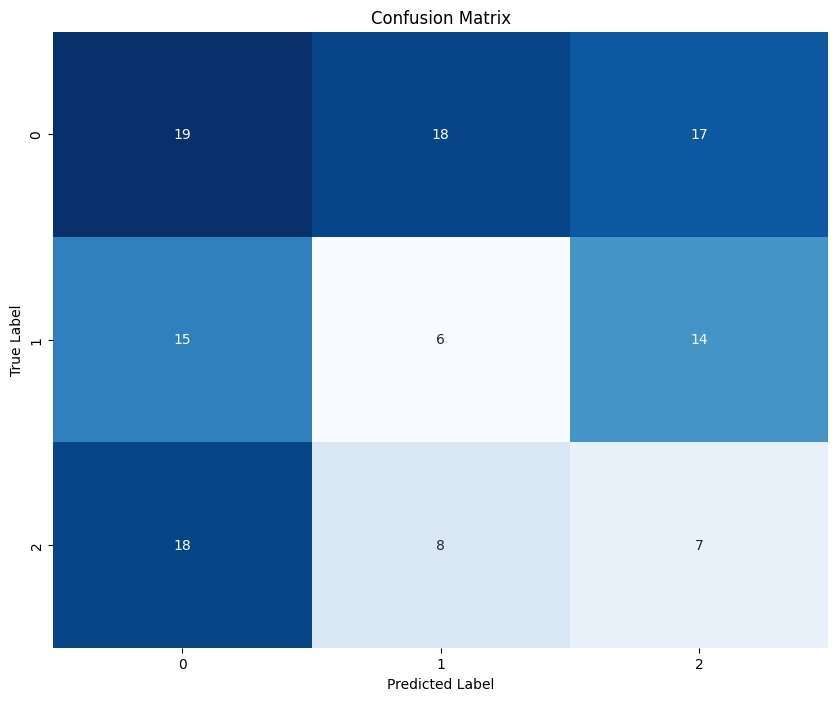

In [6]:
y_pred_prob = mobilenet_model.predict(validation_data)
y_pred = np.argmax(y_pred_prob, axis=1)

# True labels for validation data
y_true = np.concatenate([y for x, y in validation_data], axis=0)

# Calculate and print evaluation metrics
precision = precision_score(y_true, y_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_true, y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 Score:", f1)

acc=accuracy_score(y_true,y_pred)
print("Accuracy:",acc)

conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()